In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Dates
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [3]:
# BAC is Bank of America
# C is Citigroup
# GS is Goldman Sachs
# JPM is JPMorgan Chase
# MS is Morgan Stanley
# WFC is Wells Fargo

In [4]:
# Fetch stock data from Yahoo
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
df = yf.download(tickers, start=start, end=end, group_by='ticker',auto_adjust=False)

[*********************100%***********************]  6 of 6 completed


In [5]:
# Organize into bank_stocks DataFrame
bank_stocks = df.copy()
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [6]:
bank_stocks.head()

Bank Ticker         MS                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2010-01-04   30.700001  31.969999  30.629999  30.910000  21.996058  20371000   
2010-01-05   31.010000  32.130001  30.930000  32.040001  22.800182  22523400   
2010-01-06   31.969999  32.590000  31.790001  32.450001  23.091948  17028500   
2010-01-07   32.459999  33.270000  32.270000  32.919998  23.426405  18693000   
2010-01-08   32.599998  32.820000  31.980000  32.250000  22.949623  15993400   

Bank Ticker        BAC                                   ...          C  \
Stock Info        Open       High        Low      Close  ...        Low   
Date                                                     ...              
2010-01-04   15.240000  15.750000  15.120000  15.690000  ...  33.400002   
2010-01-05   15.740000  16.209999  15.700000  16.200001  ...  34.099998   
2010-01-06   16.209999  16.540001  16.030001  16.389999  ...  35.099998   
2010-01-07   16.680000  17.190001  16.510000  16.930000  ...  36.099998   
2010-01-08   16.980000  17.100000  16.629999  16.780001  ...  35.099998   

Bank Ticker                                        WFC                    \
Stock Info       Close  Adj Close    Volume       Open   High        Low   
Date                                                                       
2010-01-04   34.000000  25.378521  40679350  27.020000  27.48  26.820000   
2010-01-05   35.299999  26.348866  66861710  27.270000  28.24  27.240000   
2010-01-06   36.400002  27.169947  67433890  28.030001  28.33  27.790001   
2010-01-07   36.500000  27.244581  67245190  28.120001  29.43  27.920000   
2010-01-08   35.900002  26.796730  62409770  28.900000  29.35  28.600000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2010-01-04   27.320000  18.120781  39335700  
2010-01-05   28.070000  18.618235  55416000  
2010-01-06   28.110001  18.644762  33237000  
2010-01-07   29.129999  19.321308  61649000  
2010-01-08   28.860001  19.142223  35508700  

[5 rows x 36 columns]

In [7]:
#max close price for each bank
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
MS      58.910000
BAC     35.520000
JPM    139.399994
GS     273.380005
C       80.080002
WFC     65.930000
dtype: float64

In [8]:
returns = pd.DataFrame()

In [9]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.032505,0.038235,0.017680,0.019370,0.036558,0.027452
2010-01-06,0.011728,0.031162,-0.010673,0.005494,0.012796,0.001425
2010-01-07,0.032947,0.002747,0.019568,0.019809,0.014484,0.036286
2010-01-08,-0.008860,-0.016438,-0.018911,-0.002456,-0.020352,-0.009269


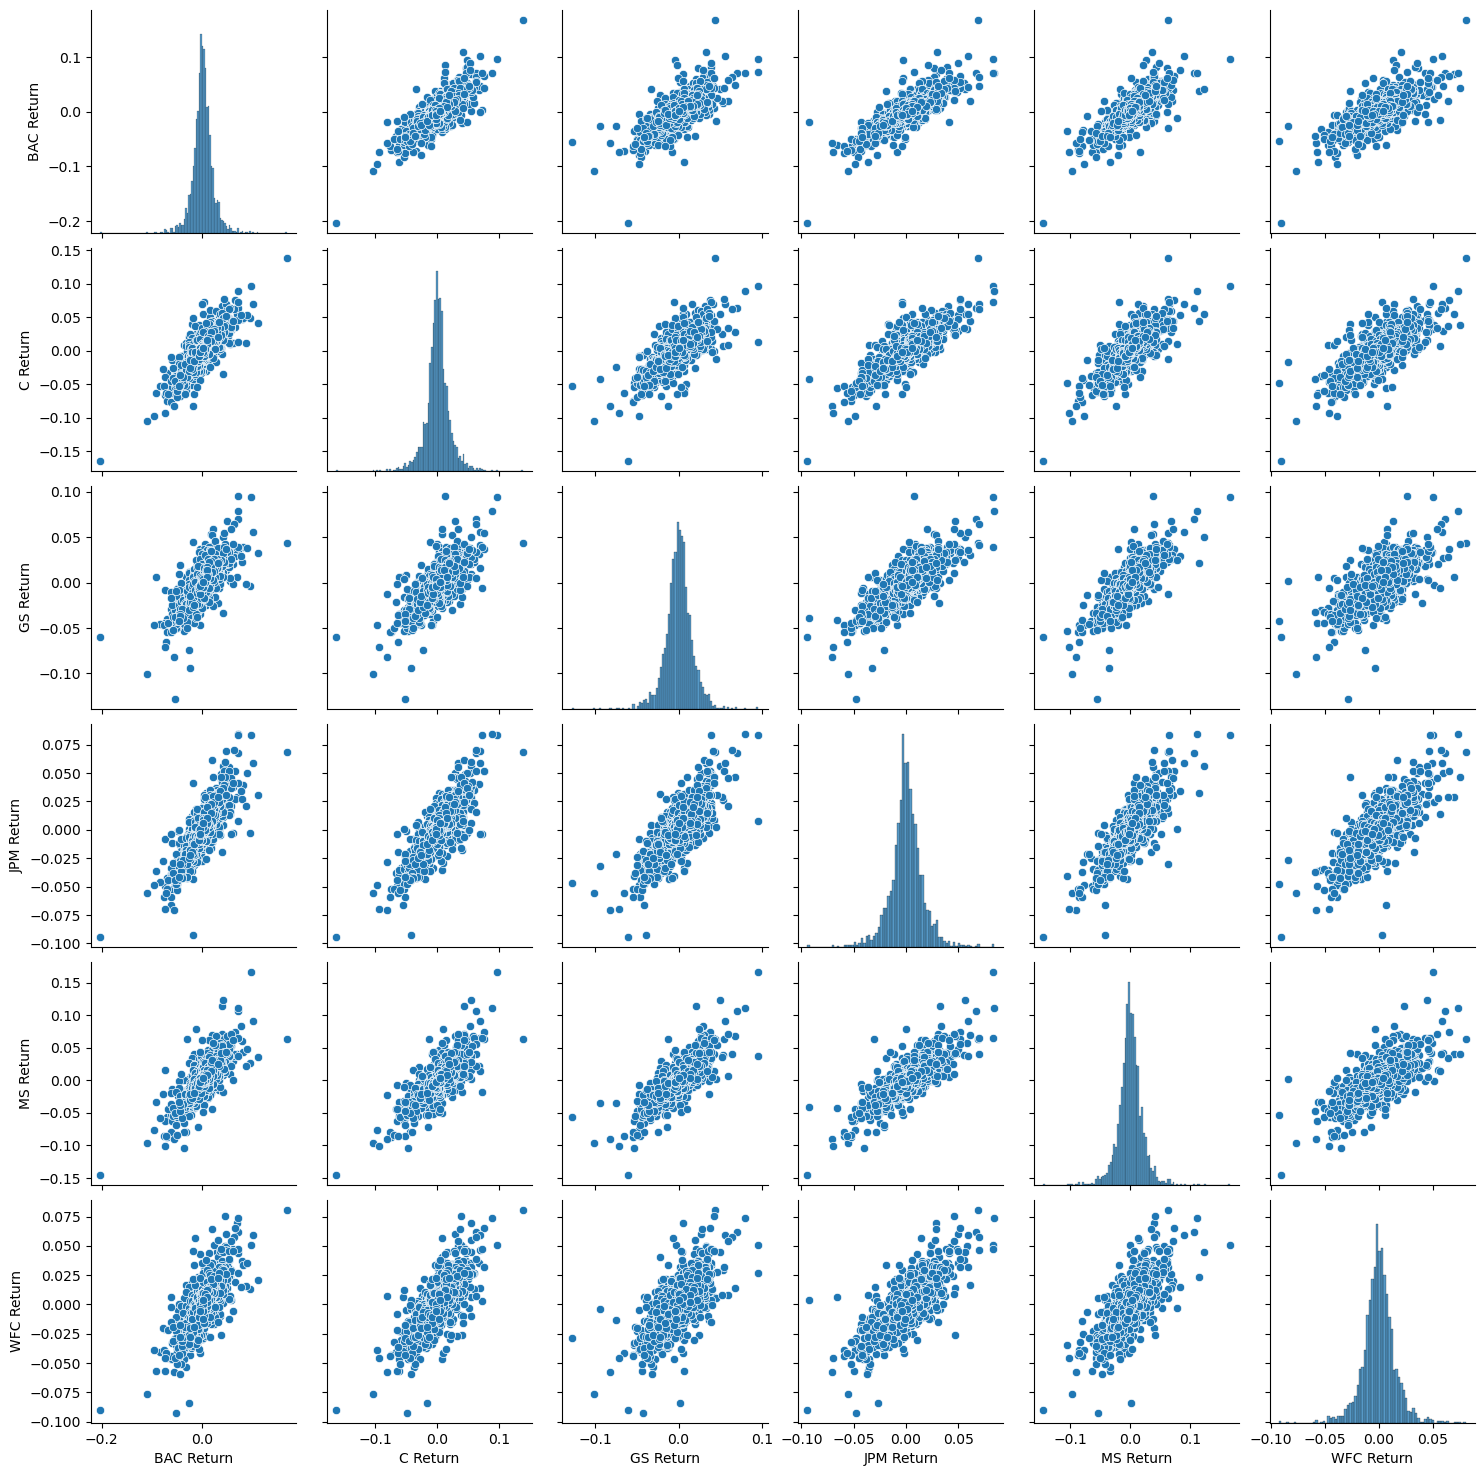

In [10]:
#create pairplot using seaborn
sns.pairplot(returns[1:])
plt.show()

In [11]:
# lowest drop
returns.idxmin()

BAC Return   2011-08-08
C Return     2011-08-08
GS Return    2010-04-16
JPM Return   2011-08-08
MS Return    2011-08-08
WFC Return   2018-02-05
dtype: datetime64[ns]

In [12]:
# Highest in single day
returns.idxmax()

BAC Return   2011-08-09
C Return     2011-08-09
GS Return    2019-01-16
JPM Return   2011-11-30
MS Return    2011-10-27
WFC Return   2011-08-09
dtype: datetime64[ns]

In [13]:
returns.std() # Morgan Stanley is the Riskiest

BAC Return    0.020466
C Return      0.019520
GS Return     0.016418
JPM Return    0.015781
MS Return     0.020769
WFC Return    0.015169
dtype: float64

In [14]:
returns.loc['2015-01-01':'2015-12-31']

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


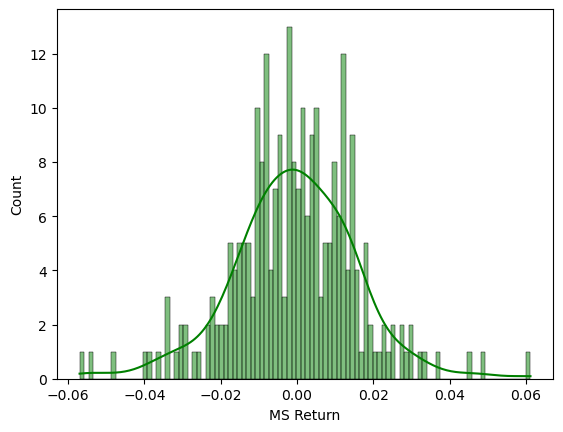

In [15]:
#create histplot using seaborn for Morgan Stanley
sns.histplot(returns.loc['2015-01-01':'2015-12-31', 'MS Return'] , color='green', bins=100 , kde=True)
plt.show()

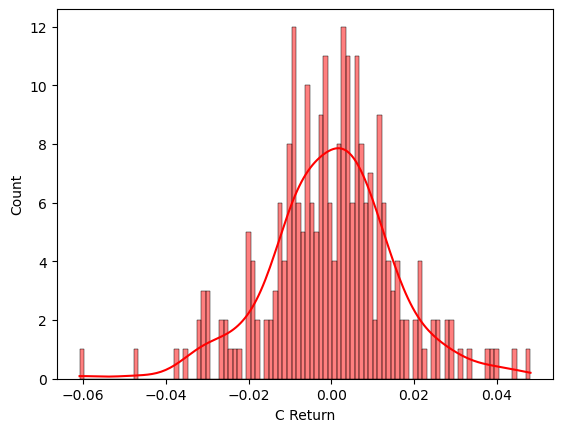

In [16]:
#create histplot using seaborn for Citigroup
sns.histplot( returns.loc['2015-01-01':'2015-12-31', 'C Return'] , color='red', bins=100 , kde=True )
plt.show()

In [17]:
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

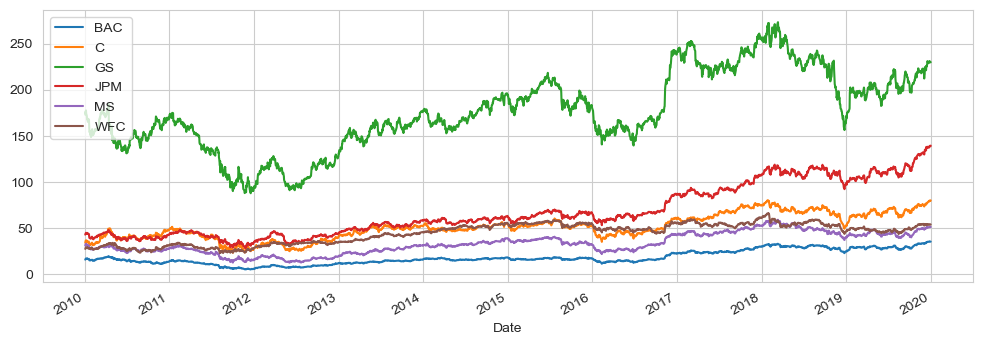

In [18]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.show()

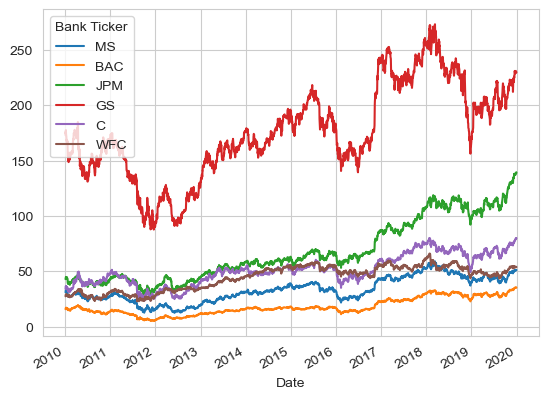

In [19]:
#create lineplot for each bank
bank_stocks.xs(key='Close',axis = 1,level='Stock Info').plot()
plt.show()

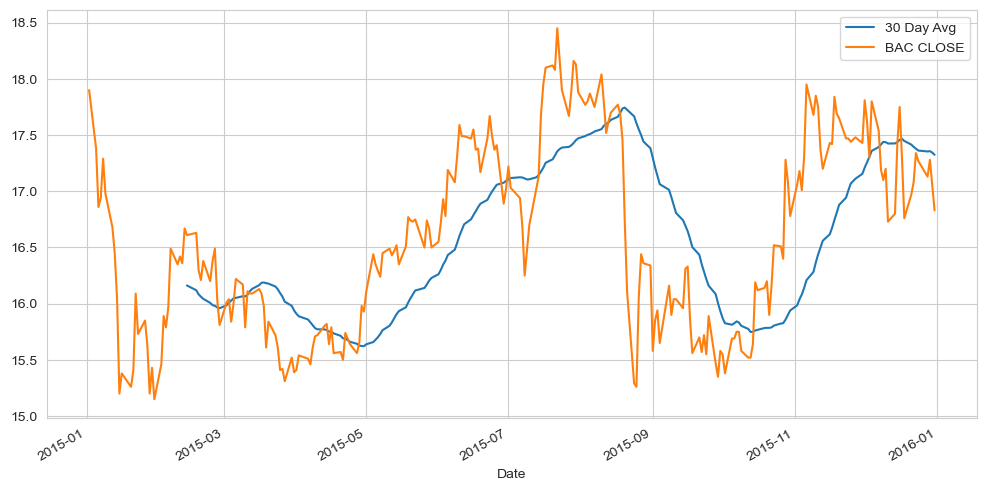

In [20]:
#set the size
plt.figure(figsize=(12,6))

#Create two plot one for average other for overall
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].plot(label='BAC CLOSE')
plt.legend()

plt.show()

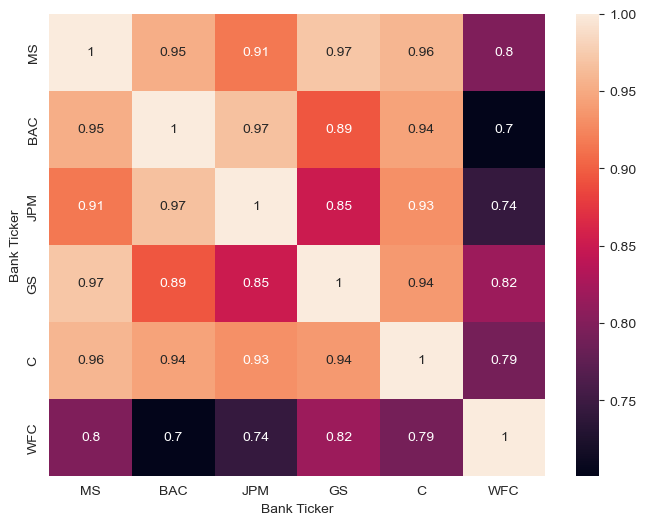

In [21]:
#change the size 
plt.figure(figsize=(8,6))

#create heatmap
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

plt.show()

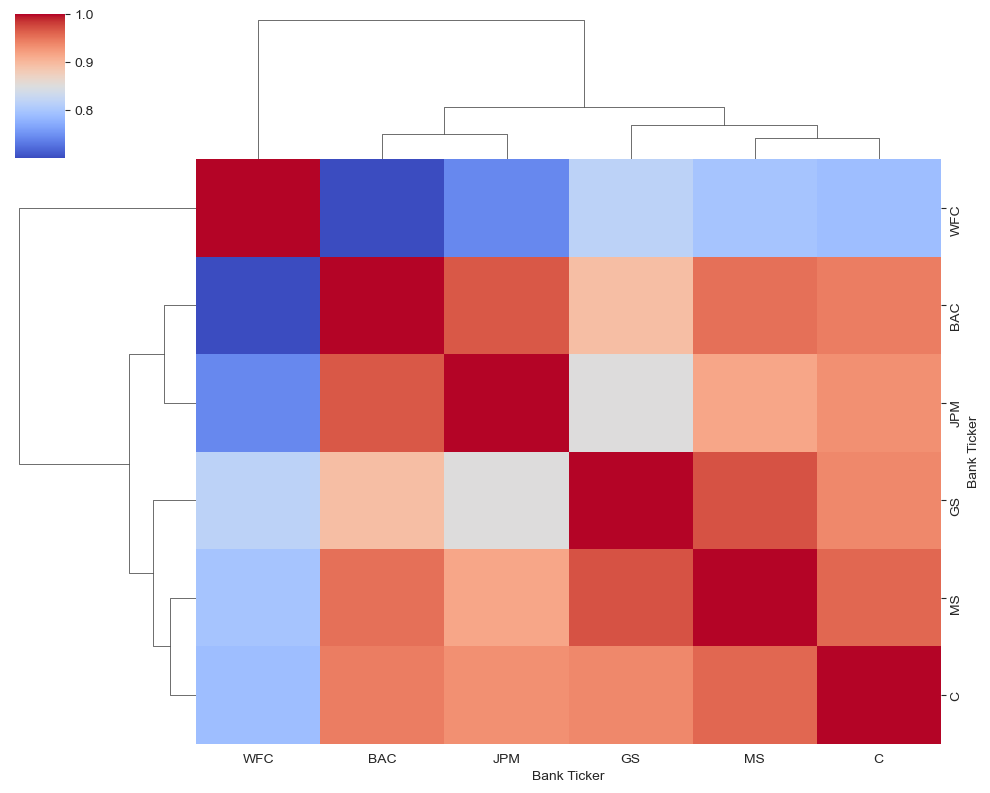

In [23]:
# create clustermap

corr_matrix = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

corr_matrix = corr_matrix.dropna(axis=0, how='any').dropna(axis=1, how='any')

sns.clustermap(corr_matrix, cmap='coolwarm', figsize=(10,8))

plt.show()


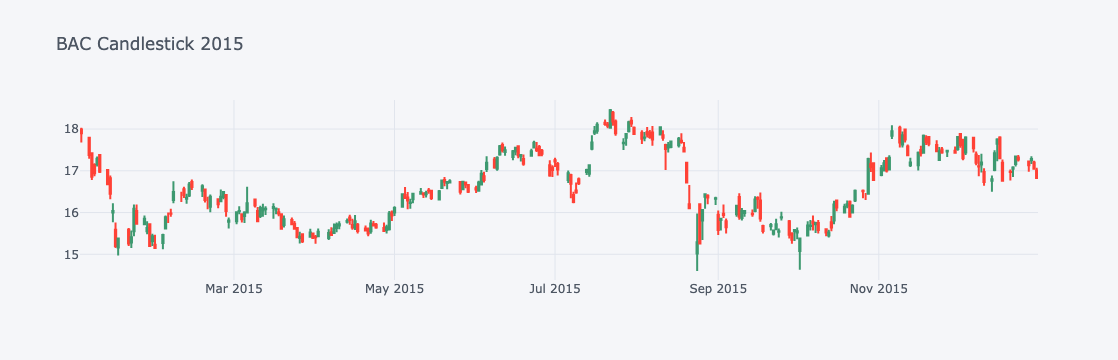

In [25]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True)

bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle', title='BAC Candlestick 2015')


In [ ]:
Thank You !!